<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Coastal Interactions: Monitoring Hurricane Helene and its impacts on the coast of Florida </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the product used](#3.1.-Presentation-of-the-product-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
- [4. Exploring the dataset](#4.-Exploring-the-dataset)
    - [4.1. First look at the data](#4.1.-First-look-at-the-data)
    - [4.2. Basic dataset manipulations](#4.2.-Basic-dataset-manipulations)
    - [4.3 Drawing a wind vector field](#4.3-Drawing-a-wind-vector-field)
- [5. Monitoring the trajectory of the Hurricane](#5.-Monitoring-the-trajectory-of-the-Hurricane)
- [6. Highlighting the storm surge using in-situ data.](#6.-Highlighting-the-storm-surge-using-in-situ-data.)
- [7. Looking at the coastal impacts of the hurricane using Sentinel 2 images](#7.-Looking-at-the-coastal-impacts-of-the-hurricane-using-Sentinel-2-images)
- [8. Conclusion](#8.-Conclusion)
- [9. Exercises](#9.-Exercises)



# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


Storm surges are coastal flooding phenomena caused by high winds and low atmospheric pressure during severe storms like hurricanes or typhoons. They lead to significant inundation of coastal areas, posing threats to lives, infrastructure, and ecosystems. Storm surges are particularly devastating when coinciding with high tides, amplifying water levels and resulting in catastrophic flooding.

Hurricane Helene, which occurred in September 2024, was a stark reminder of the destructive potential of these events. Classified as a major hurricane, Helene affected parts of the Atlantic basin, causing dangerous storm surges and widespread damage. Its high-intensity winds, coupled with its timing near densely populated coastlines, brought severe coastal flooding, underlining the need for advanced monitoring techniques.

Remote sensing plays a critical role in the monitoring and management of storm surges by providing real-time, large-scale, and high-resolution data. Satellites equipped with radar altimeters, scatterometers, and synthetic aperture radar (SAR) can track hurricane intensity and movement, measure sea Surface heights and wind fields, provide pre- and post-Event assessments.

| <img src="img/Helene.jpg" width="800"> | 
|:--:| 
| Hurricane Helene. From [NOAA](https://www.aoml.noaa.gov/es/hurricane-helene-breaking-records-in-hurricane-data-collection/). |


In this training, we will monitor the trajectory of the hurricane using wind observations, highlight the storm surge using several tide gauges and assess the coastal floodings with satellite images.

# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|
|**rasterio**|[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a powerful tool for reading, writing, analyzing, and manipulating geospatial raster data, leveraging Python's capabilities and supporting formats like GeoTIFF with ease.|

In [1]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import geopandas as gpd

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this section, we are going to use the ["Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model"](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AWIND_GLO_PHY_L4_NRT_012_004) product. It offers hourly Level-4 sea surface wind and stress fields at a spatial resolution of 0.125 degrees. It integrates scatterometer data from Metop-B and Metop-C ASCAT with collocated variables from the European Centre for Medium-Range Weather Forecasts (ECMWF) operational model to compute temporally-averaged difference fields. These difference fields are used to correct persistent biases in ECMWF’s hourly model outputs. The product includes stress-equivalent wind and stress variables, along with their divergence and curl, as well as the applied bias corrections, the standard deviation of differences (for wind and stress), and the variance differences (for divergence and curl).

| Parameter | Value |
| :---: | :---|
| **Variables used** | eastward_wind, northward_wind |
| **Product identifier** |[EO:MO:DAT:WIND_GLO_PHY_L4_NRT_012_004](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AWIND_GLO_PHY_L4_NRT_012_004) |
| **Temporal resolution** | Hourly |
| **Spatial resolution** | 0.125° × 0.125° |
| **Temporal coverage** | 3 Oct 2022 to 18 Nov 2024 |


<center>
    <img src="img/product_wind.png" width="200">
</center>

You can also visit the [Copernicus page](https://data.marine.copernicus.eu/product/WIND_GLO_PHY_L4_NRT_012_004/description) dedicated to the product to see more detail about the product and all the different variables that are available, and access to the User Manual.


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-install-the-hda-api-python-client). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:



In [2]:
# Modules related to data retrieving
from hda import Client
import json

from pathlib import Path

# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    import getpass
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

hda_client = Client()

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the data can be found in the `data` folder, file `data/atm/atm_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python), and copy/paste it in a file (or directly in a notebook cell).

<center>
    <img src="img/data_req.png" width="300">
</center>

Let's visualize our request.

In [3]:
# Loading request from json file (September S2 image)
with open('./data/atm/atm_req.json', 'r') as f:
    data = json.load(f)
data


{'dataset_id': 'EO:MO:DAT:WIND_GLO_PHY_L4_NRT_012_004:cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H_202207',
 'startdate': '2024-09-20T04:00:00.000Z',
 'enddate': '2024-10-01T04:00:00.000Z',
 'bbox': [-99.00460864729645,
  17.538945458430984,
  -65.30725117419546,
  36.827122701611785],
 'variables': ['eastward_wind', 'northward_wind'],
 'itemsPerPage': 200,
 'startIndex': 0}

Running the next cell will launch [**the downloading of the data (more details)**](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). Depending on the product and request, it may take some time. 


In [ ]:
### Retrieve data
## Path to local data storage
output_path = 'data/atm'

## Run the search with query
matches = hda_client.search(data)

## Print results
print(matches)

matches.download(output_path)

SearchResults[items=1,volume=169.2MB]


# 4. Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)


## 4.1. First look at the data

[Go back to the "Table of contents"](#Table-of-contents)

We have downloaded the needed data. The location of the file is : `data/atm/cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H_multi-vars_99.00W-65.31W_17.54N-36.83N_2024-09-20-2024-10-01_796e3d735992e242fa91a33c7fe2b1d2.nc`. Let's now open it using the **xarray** library.


In [4]:
ds_w = xr.open_dataset('data/atm/cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H_multi-vars_99.00W-65.31W_17.54N-36.83N_2024-09-20-2024-10-01_796e3d735992e242fa91a33c7fe2b1d2.nc')
ds_w

<xarray.Dataset> Size: 177MB
Dimensions:         (time: 265, latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
  * time            (time) datetime64[ns] 2kB 2024-09-20T04:00:00 ... 2024-10...
Data variables:
    eastward_wind   (time, latitude, longitude) float64 89MB ...
    northward_wind  (time, latitude, longitude) float64 89MB ...
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

## 4.2. Basic dataset manipulations

[Go back to the "Table of contents"](#Table-of-contents)


The most common thing you will want to do with your dataset is to subset it, to select a specific geographic area, depth and/or time period. To do so, we will use the function [`.sel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html) and [`.isel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.isel.html). 

The following cell shows, as an example, different ways to select a datetime or a range of datetimes from the `ds_w` dataset. Indeed, we have seen that this dataset contains 265 datetimes and we may need to reduce it. These methods can of course be used with any other dimension of the dataset, you just have to check on the dimensions names before.

In [5]:
# Check the date times included in the file
ds_w['time']

<xarray.DataArray 'time' (time: 265)> Size: 2kB
array(['2024-09-20T04:00:00.000000000', '2024-09-20T05:00:00.000000000',
       '2024-09-20T06:00:00.000000000', ..., '2024-10-01T02:00:00.000000000',
       '2024-10-01T03:00:00.000000000', '2024-10-01T04:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2024-09-20T04:00:00 ... 2024-10-01T04:...
Attributes:
    validStartDate:   2022-10-03T16:00:00.000000000Z
    validStartIndex:  19792
    valid_min:        1095652800
    valid_max:        1096603200

In [6]:
# If you know the exact date
ds_w.sel(time='2024-09-27T11:00:00')

<xarray.Dataset> Size: 671kB
Dimensions:         (latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
    time            datetime64[ns] 8B 2024-09-27T11:00:00
Data variables:
    eastward_wind   (latitude, longitude) float64 335kB ...
    northward_wind  (latitude, longitude) float64 335kB ...
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

In [7]:
# If you don't know the exact date and want to take the nearest one
ds_w.sel(time='2024-09-27T04:35:0', method='nearest')

<xarray.Dataset> Size: 671kB
Dimensions:         (latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
    time            datetime64[ns] 8B 2024-09-27T05:00:00
Data variables:
    eastward_wind   (latitude, longitude) float64 335kB ...
    northward_wind  (latitude, longitude) float64 335kB ...
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

In [8]:
# If you want to select a date from its index
ds_w.isel(time=[3])

<xarray.Dataset> Size: 671kB
Dimensions:         (time: 1, latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
  * time            (time) datetime64[ns] 8B 2024-09-20T07:00:00
Data variables:
    eastward_wind   (time, latitude, longitude) float64 335kB ...
    northward_wind  (time, latitude, longitude) float64 335kB ...
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

In [9]:
# If you want to select a range of dates
# Here, let's for example select the last week of September
ds_w.sel(time=slice('2024-09-23','2024-09-30'))

<xarray.Dataset> Size: 129MB
Dimensions:         (time: 192, latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
  * time            (time) datetime64[ns] 2kB 2024-09-23 ... 2024-09-30T23:00:00
Data variables:
    eastward_wind   (time, latitude, longitude) float64 64MB ...
    northward_wind  (time, latitude, longitude) float64 64MB ...
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

Now you know how to subset an xarray dataset. Remember that you can perform the same operation on other dimensions like longitude or latitude (to perform spatial subsetting).


## 4.3 Drawing a wind vector field

[Go back to the "Table of contents"](#Table-of-contents)


We have in the dataset the northward and eastward components of the wind field over Florida. We can use them to draw the vector field of the wind in the region. We can also combine them to compute the total wind speed, by calculating the norm of each vector. 


 Wind Speed= $\sqrt{u²+v²}$

In [10]:
# compute wind norm

ds_w['wind'] = np.sqrt(ds_w.eastward_wind*ds_w.eastward_wind + ds_w.northward_wind*ds_w.northward_wind)
ds_w

<xarray.Dataset> Size: 266MB
Dimensions:         (time: 265, latitude: 155, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 620B 17.56 17.69 17.81 ... 36.69 36.81
  * longitude       (longitude) float32 1kB -98.94 -98.81 ... -65.44 -65.31
  * time            (time) datetime64[ns] 2kB 2024-09-20T04:00:00 ... 2024-10...
Data variables:
    eastward_wind   (time, latitude, longitude) float64 89MB ...
    northward_wind  (time, latitude, longitude) float64 89MB ...
    wind            (time, latitude, longitude) float64 89MB 1.963 ... 9.041
Attributes: (12/27)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...
    copernicusmarine_version:   1.3.3

We will use the wind speed as a background for the vector field !

To draw a vector field, you can use the *quiver* function from the **matplotlib** library. As follows :

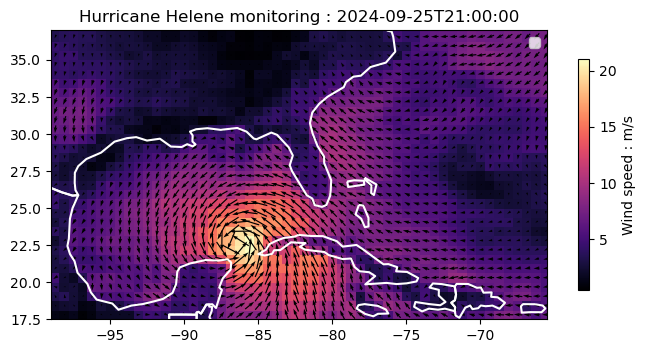

In [12]:
# coarsening the dataset to have bigger pixels and ease readibility.
ds_w_bis = ds_w.coarsen(latitude=5, longitude=5, boundary="trim").mean()

x = ds_w_bis.longitude.data
y = ds_w_bis.latitude.data

fig, ax = plt.subplots(figsize=(8,6))
t_plot = "2024-09-25T21:00:00"
date_plot = ds_w_bis.sel(time=t_plot, method="nearest")

ax.set_xlim(-99, -65.5)
ax.set_ylim(17.5, 37)

## drawing background map of windspeed 
im = ax.pcolor(date_plot["longitude"], date_plot["latitude"], date_plot["wind"], cmap="magma")
cbar = ax.figure.colorbar(im, ax=ax, label='Wind speed : m/s', shrink=0.5)

# drawing vector field
qv = ax.quiver(x, y, date_plot["eastward_wind"], date_plot["northward_wind"], pivot='mid', angles='xy')
# plt.quiverkey(qv, -70, 35, 2, 'wind speed', coordinates='data')
world = gpd.read_file('data/coastlines/ne_110m_admin_0_countries.shp')
world.boundary.plot(ax=ax, color='w')
ax.set_title('Hurricane Helene monitoring : %s'%t_plot)
ax.legend();

The eye of the hurricane is clearly visible on this map. We observe that the wind direction is circling around it with increasing strength as we get closer to the hurricane.

# 5. Monitoring the trajectory of the Hurricane

[Go back to the "Table of contents"](#Table-of-contents)


In this section we are going to create an animation of the hurricane to see it's trajectory across Florida. We will select only the three days where the cyclone is visible on the map, between September 25th and September 28th.

In [11]:
ds_w_sub = ds_w.sel(time=slice('2024-09-25','2024-09-27'))

In [12]:
world = gpd.read_file('data/coastlines/ne_110m_admin_0_countries.shp')


for i in range(len(ds_w_sub.time.data)):
    fig, ax = plt.subplots(figsize=(8,6))
    
    ax.set_xlim(-99, -65.5)
    ax.set_ylim(17.5, 37)
    
    t_plot = str(ds_w_sub.time.data[i])
    date_plot = ds_w.sel(time=t_plot, method="nearest")
    
    im = ax.pcolor(date_plot["longitude"], date_plot["latitude"], date_plot["wind"], cmap="magma", vmin=0, vmax=25)
    cbar = ax.figure.colorbar(im, ax=ax, label='Wind speed : m/s', shrink=0.5)
    world.boundary.plot(ax=ax, color='w')
    ax.set_title('Hurricane Helene monitoring : %s'%t_plot)
    
    plt.savefig('out/hurricane_traj/hurricane_traj_%s.png' % t_plot)
    plt.close()

In [13]:
# Import the modules for the animation
from PIL import Image 
from pathlib import Path
from IPython.display import display, HTML

In [14]:
# Search image files
image_path = Path('out/hurricane_traj/')
images = sorted(image_path.glob('hurricane_traj_*.png'))

# Load the images
images_files = [Image.open(file) for file in images]

# Save as a GIF
images_files[0].save(
    'out/animated_hurricane.gif', 
    save_all=True, 
    append_images=images_files[1:], 
    duration=100,  # Duration between frames in milliseconds
    loop=10         
)

In [15]:
# Visualisation
display(HTML('<img src="out/animated_hurricane.gif" width="800"/>')) 

We have now oberserved very closely, thanks to satellite observation, how hurricane Helene struck the coast of Florida. Let's now see how it affected sea levels near the coasts using local tide gauges.

# 6. Highlighting the storm surge using in-situ data.

[Go back to the "Table of contents"](#Table-of-contents)


For this section we retrieved data from the [NOAA's Center for Operational Oceanographic Products and Services](https://tidesandcurrents.noaa.gov/map/). Several tide gauges are available in Florida. Let's take a look at the station located at [Cedar Key](https://tidesandcurrents.noaa.gov/stationhome.html?id=8727520#available).

In [16]:
df_is_8727520 = pd.read_csv('data/tg/CO-OPS_8727520_met.csv')
df_is_8727520

,Date,Time (GMT),Predicted (m),Preliminary (m),Verified (m)
0,2024/09/20,00:00,-0.082,-,0.037
1,2024/09/20,01:00,-0.281,-,-0.141
2,2024/09/20,02:00,-0.351,-,-0.127
3,2024/09/20,03:00,-0.262,-,0.054
4,2024/09/20,04:00,-0.052,-,0.305
...,...,...,...,...,...
355,2024/10/04,19:00,0.469,-,-
356,2024/10/04,20:00,0.518,-,-
357,2024/10/04,21:00,0.457,-,-
358,2024/10/04,22:00,0.315,-,-


The dataset provides us with two sea level variables : a prediction from a model, and the verified observation. Both are Sea Level Anomalies related to the Mean Sea Level. We are going to compare the two. But before that, we need to pre-process the Date and Time columns, in order to convert them to a format that Python can read.

In [17]:
# creating Datetime column

df_is_8727520['datetime'] = pd.to_datetime(df_is_8727520[['Date', 'Time (GMT)']].agg(' '.join, axis=1))
df_is_8727520

,Date,Time (GMT),Predicted (m),Preliminary (m),Verified (m),datetime
0,2024/09/20,00:00,-0.082,-,0.037,2024-09-20 00:00:00
1,2024/09/20,01:00,-0.281,-,-0.141,2024-09-20 01:00:00
2,2024/09/20,02:00,-0.351,-,-0.127,2024-09-20 02:00:00
3,2024/09/20,03:00,-0.262,-,0.054,2024-09-20 03:00:00
4,2024/09/20,04:00,-0.052,-,0.305,2024-09-20 04:00:00
...,...,...,...,...,...,...
355,2024/10/04,19:00,0.469,-,-,2024-10-04 19:00:00
356,2024/10/04,20:00,0.518,-,-,2024-10-04 20:00:00
357,2024/10/04,21:00,0.457,-,-,2024-10-04 21:00:00
358,2024/10/04,22:00,0.315,-,-,2024-10-04 22:00:00


Let's plot the data ! 

(24.135, 34.135000000000005)

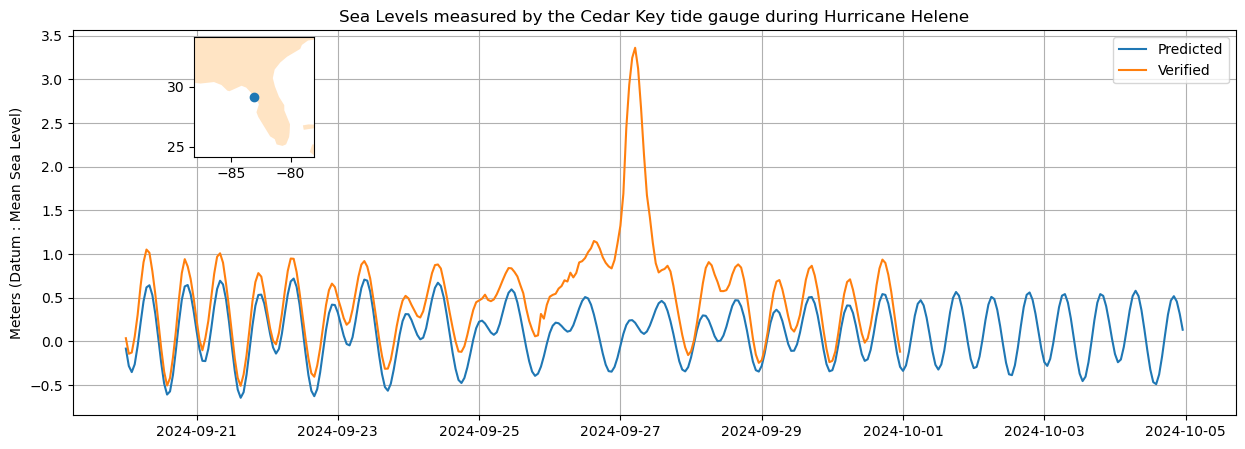

In [18]:
# coordinates of TG
lon_is_8727520, lat_is_8727520 = (-83.0317, 29.135)

fig, ax = plt.subplots(figsize = (15,5))

ax.plot(df_is_8727520['datetime'], df_is_8727520['Predicted (m)'], label = 'Predicted')
ax.plot(df_is_8727520['datetime'], df_is_8727520['Verified (m)'].replace('-', np.nan).astype(np.float32), label='Verified')
ax.grid(True)
ax.set_title('Sea Levels measured by the Cedar Key tide gauge during Hurricane Helene')
ax.set_ylabel('Meters (Datum : Mean Sea Level)')
ax.legend()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax, width="30%", height=1.2, loc="upper left")

world = gpd.read_file('data/coastlines/ne_110m_admin_0_countries.shp')

world.plot(ax =inset_ax, color='bisque')
inset_ax.scatter([lon_is_8727520], [lat_is_8727520])
inset_ax.set_xlim(lon_is_8727520 - 5, lon_is_8727520 +5)
inset_ax.set_ylim(lat_is_8727520 - 5, lat_is_8727520 +5)


the storm surge caused by the hurricane is clearly visible on the graph. We can also see that it was not predicted at all, which accounts for the exceptionnal nature of such events.

Let's see if neighboring tide gauges show storm surges of similar magnitude.

In [23]:
# other tide gauges :

df_is_8728690 = pd.read_csv('data/tg/CO-OPS_8728690_met.csv')
df_is_8728690['datetime'] = pd.to_datetime(df_is_8728690[['Date', 'Time (GMT)']].agg(' '.join, axis=1))
lon_is_8728690 , lat_is_8728690 = (-84.98, 29.725)

df_is_8729108 = pd.read_csv('data/tg/CO-OPS_8729108_met.csv')
df_is_8729108['datetime'] = pd.to_datetime(df_is_8729108[['Date', 'Time (GMT)']].agg(' '.join, axis=1))
lon_is_8729108 , lat_is_8729108 = (-85.665, 30.15)

df_is_8726724 = pd.read_csv('data/tg/CO-OPS_8726724_met.csv')
df_is_8726724['datetime'] = pd.to_datetime(df_is_8726724[['Date', 'Time (GMT)']].agg(' '.join, axis=1))
lon_is_8726724 , lat_is_8726724 = (-82.83166666666666, 27.9783333)

df_is_8725114 = pd.read_csv('data/tg/CO-OPS_8725114_met.csv')
df_is_8725114['datetime'] = pd.to_datetime(df_is_8725114[['Date', 'Time (GMT)']].agg(' '.join, axis=1))
lon_is_8725114 , lat_is_8725114 = (-81.78833333333333, 26.1366667)

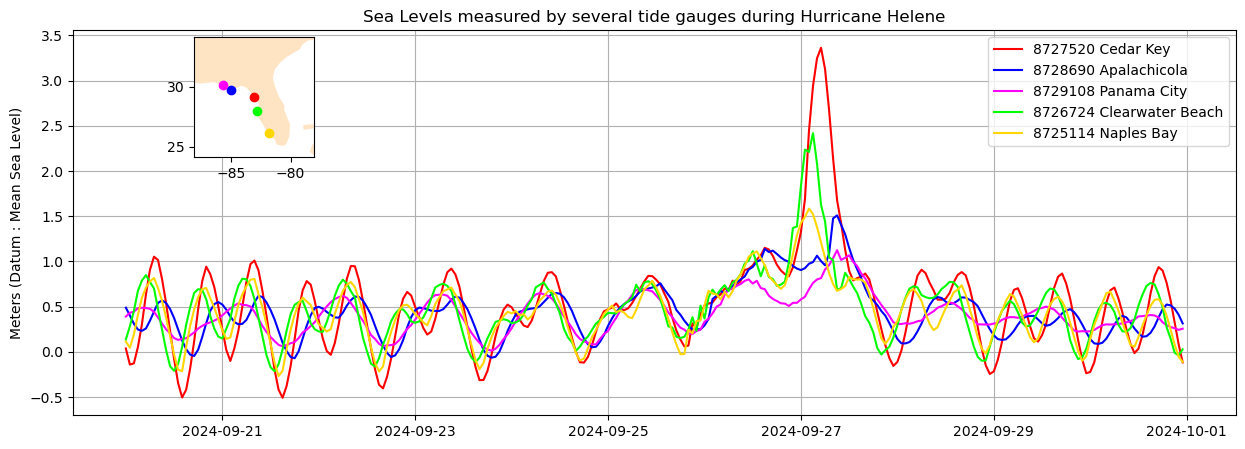

In [24]:
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(df_is_8727520['datetime'], df_is_8727520['Verified (m)'].replace('-', np.nan).astype(np.float32), label='8727520 Cedar Key', color='r')
ax.plot(df_is_8728690['datetime'], df_is_8728690['Verified (m)'].replace('-', np.nan).astype(np.float32), label='8728690 Apalachicola', color='b')
ax.plot(df_is_8729108['datetime'], df_is_8729108['Verified (m)'].replace('-', np.nan).astype(np.float32), label='8729108 Panama City', color='fuchsia')
ax.plot(df_is_8726724['datetime'], df_is_8726724['Verified (m)'].replace('-', np.nan).astype(np.float32), label='8726724 Clearwater Beach', color='lime')
ax.plot(df_is_8725114['datetime'], df_is_8725114['Verified (m)'].replace('-', np.nan).astype(np.float32), label='8725114 Naples Bay', color='gold')

ax.grid(True)
ax.set_title('Sea Levels measured by several tide gauges during Hurricane Helene')
ax.set_ylabel('Meters (Datum : Mean Sea Level)')
ax.legend()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax, width="30%", height=1.2, loc="upper left")

world = gpd.read_file('data/coastlines/ne_110m_admin_0_countries.shp')

world.plot(ax =inset_ax, color='bisque')
inset_ax.scatter([lon_is_8727520], [lat_is_8727520], color='r')
inset_ax.scatter([lon_is_8728690], [lat_is_8728690], color='b')
inset_ax.scatter([lon_is_8729108], [lat_is_8729108], color='fuchsia')
inset_ax.scatter([lon_is_8726724], [lat_is_8726724], color='lime')
inset_ax.scatter([lon_is_8725114], [lat_is_8725114], color='gold')

inset_ax.set_xlim(lon_is_8727520 - 5, lon_is_8727520 +5)
inset_ax.set_ylim(lat_is_8727520 - 5, lat_is_8727520 +5);



Cedar Key seems to be one of the places where the storm surge caused by the hurricane was the strongest. The second highest storm surge happened on the Clearwater Beach tide gauge, which is also very near to Cedar Key. These places and their surroundings have probably been flooded during the hurricane. We are now going to take a look at Satellite images to assess the impacts of the storm.

# 7. Looking at the coastal impacts of the hurricane using Sentinel 2 images

[Go back to the "Table of contents"](#Table-of-contents)

WEkEO gives also access to Sentinel-2 images. Sentinel-2 is a European multi-spectral imaging satellite mission. It carries an optical instrument payload that samples 13 spectral bands: four bands at 10 m, six bands at 20 m and three bands at 60 m spatial resolution. In this section, we will only use spectral bands with a resolution of 10 meters (blue, green, red, near-infrared), and we will use Level-2A products (Atmospheric corrections have already been applied at this level). To know more about the mission, you can visit ESA's [Sentinel Online](https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-2) webpage.

| Parameter | Value |
| :---: | :---|
| **Spectral bands used** | B02, B03, B04, B08 |
| **Product identifier** |[EO:ESA:DAT:SENTINEL-2](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AESA%3ADAT%3ASENTINEL-2) |
| **Spatial resolution** | 10 meters|
| **Temporal coverage** | from 2015-06-23 to now |

<center>
    <img src="img/S2_thumbnail.png" width="200">
</center>

Below, we show the API requests performed in order to retrieve the images. We retrieved one image from September 22th (before the hurricane), and one from October 1st (after the hurricane). 


In [25]:
# Loading request from json file (September S2 image)
with open('./data/S2/S2_09_req.json', 'r') as f:
    data = json.load(f)
print(data)

with open('./data/S2/S2_10_req.json', 'r') as f:
    data = json.load(f)
print(data)

{'dataset_id': 'EO:ESA:DAT:SENTINEL-2', 'productIdentifier': 'S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405', 'itemsPerPage': 200, 'startIndex': 0}
{'dataset_id': 'EO:ESA:DAT:SENTINEL-2', 'productIdentifier': 'S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351', 'itemsPerPage': 200, 'startIndex': 0}


The cell below allow you to download the data, if it is not already available with the training. It may take a few minutes.

In [ ]:
# File paths and output directory
json_files = ['./data/S2/S2_09_req.json', './data/S2/S2_10_req.json']
output_path = 'data/S2'
# Process each JSON file
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f) # Load JSON query
        print(f"Loaded query from {file}")
        # Search and download data
        matches = hda_client.search(data)
        matches.download(output_path)
        print(f"Downloaded data from {file} to {output_path}")

Once the files are downloaded, we can unzip the downloaded products. **This operation has already been performed when preparing this tutorial. Executing this cell is not necessary**.

In [24]:
## Sentinel 2
## Unzip the product
import zipfile

with zipfile.ZipFile("data/S2/S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405.SAFE.zip", 'r') as zip_ref:
    zip_ref.extractall("data/S2/")
    
# Edit the path with the name of the zipfile!
with zipfile.ZipFile("data/S2/S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351.SAFE.zip", 'r') as zip_ref:
    zip_ref.extractall("data/S2/")



    # ADVICE : when you are done extracting the files, deleting the zip folder, in order to save memory space.

Let's define the area of interest that we will be looking at in this section. We will be focused on a city near Cedar Key : Horseshoe Beach.

<center>
    <img src="img/horseshoe_location.png" width="400">
</center>

In [26]:
# area of interest :

LON_MIN = -83.25606570933472
LON_MAX = -83.30722079966675
LAT_MIN = 29.425631663890186
LAT_MAX = 29.455530471194937

# making a rectangle to clip around area of interest
import geopandas as gpd
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.mask import mask

bbox = box(LON_MIN, LAT_MIN, LON_MAX, LAT_MAX)
geo_4326 = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))


Sentinel-2 images come with several spectral bands. We will be using the 4 bands that have a 10m resolution (see the image below, from [Sentinel Online](https://sentiwiki.copernicus.eu/web/s2-mission)): blue, green, red and near-infrared. 

<center>
    <img src="img/image-20230605-122808.png" width="800">
</center>

Also note that for each band, we perform a harmonization operation, consisting in substrating 1000 to the reflectance values (in digital numbers). It accounts for a radiometric offset that was added in January 2022 in Sentinel-2's processing baseline. More details on this [page](https://sentiwiki.copernicus.eu/web/s2-processing).

In [27]:
import rasterio
from rasterio.warp import calculate_default_transform

# extracting the coordinates from bbox for rasterio
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

# Each spectral band is in a different file
f_path_r_09 = 'data/S2/S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405.SAFE/GRANULE/L2A_T17RKN_A048328_20240922T162015/IMG_DATA/R10m/T17RKN_20240922T161001_B04_10m.jp2'
f_path_g_09 = 'data/S2/S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405.SAFE/GRANULE/L2A_T17RKN_A048328_20240922T162015/IMG_DATA/R10m/T17RKN_20240922T161001_B03_10m.jp2'
f_path_b_09 = 'data/S2/S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405.SAFE/GRANULE/L2A_T17RKN_A048328_20240922T162015/IMG_DATA/R10m/T17RKN_20240922T161001_B02_10m.jp2'
f_path_nir_09 = 'data/S2/S2A_MSIL2A_20240922T161001_N0511_R140_T17RKN_20240922T215405.SAFE/GRANULE/L2A_T17RKN_A048328_20240922T162015/IMG_DATA/R10m/T17RKN_20240922T161001_B08_10m.jp2'

f_path_r_10 = 'data/S2/S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351.SAFE/GRANULE/L2A_T17RKN_A048471_20241002T161350/IMG_DATA/R10m/T17RKN_20241002T161111_B04_10m.jp2'
f_path_g_10 = 'data/S2/S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351.SAFE/GRANULE/L2A_T17RKN_A048471_20241002T161350/IMG_DATA/R10m/T17RKN_20241002T161111_B03_10m.jp2'
f_path_b_10 = 'data/S2/S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351.SAFE/GRANULE/L2A_T17RKN_A048471_20241002T161350/IMG_DATA/R10m/T17RKN_20241002T161111_B02_10m.jp2'
f_path_nir_10 = 'data/S2/S2A_MSIL2A_20241002T161111_N0511_R140_T17RKN_20241002T222351.SAFE/GRANULE/L2A_T17RKN_A048471_20241002T161350/IMG_DATA/R10m/T17RKN_20241002T161111_B08_10m.jp2'


with rasterio.open(f_path_r_09) as src:
    geo = geo_4326.to_crs(src.crs)
    coords = getFeatures(geo)
    # cropping the image to the area of interest
    red_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    # note: recent Sentinel-2 images have a new processing baseline. The two next lines of code consist in adapting the values 
    # to harmonize the new S2 images with the older ones.
    red_09[red_09 <1000] = 0
    red_09[red_09 >= 1000] -= 1000
with rasterio.open(f_path_g_09) as src:
    green_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    green_09[green_09 <1000] = 0
    green_09[green_09 >= 1000] -= 1000
with rasterio.open(f_path_b_09) as src:
    blue_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    blue_09[blue_09 <1000] = 0
    blue_09[blue_09 >= 1000] -= 1000
with rasterio.open(f_path_nir_09) as src:
    nir_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    nir_09[nir_09 <1000] = 0
    nir_09[nir_09 >= 1000] -= 1000


with rasterio.open(f_path_r_10) as src:
    geo = geo_4326.to_crs(src.crs)
    coords = getFeatures(geo)
    # cropping the image to the area of interest
    red_10, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    # note: recent Sentinel-2 images have a new processing baseline. The two next lines of code consist in adapting the values 
    # to harmonize the new S2 images with the older ones.
    red_10[red_10 <1000] = 0
    red_10[red_10 >= 1000] -= 1000
with rasterio.open(f_path_g_10) as src:
    green_10, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    green_10[green_10 <1000] = 0
    green_10[green_10 >= 1000] -= 1000
with rasterio.open(f_path_b_10) as src:
    blue_10, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    blue_10[blue_10 <1000] = 0
    blue_10[blue_10 >= 1000] -= 1000
with rasterio.open(f_path_nir_10) as src:
    nir_10, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
    nir_10[nir_10 <1000] = 0
    nir_10[nir_10 >= 1000] -= 1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.12].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..5.224].


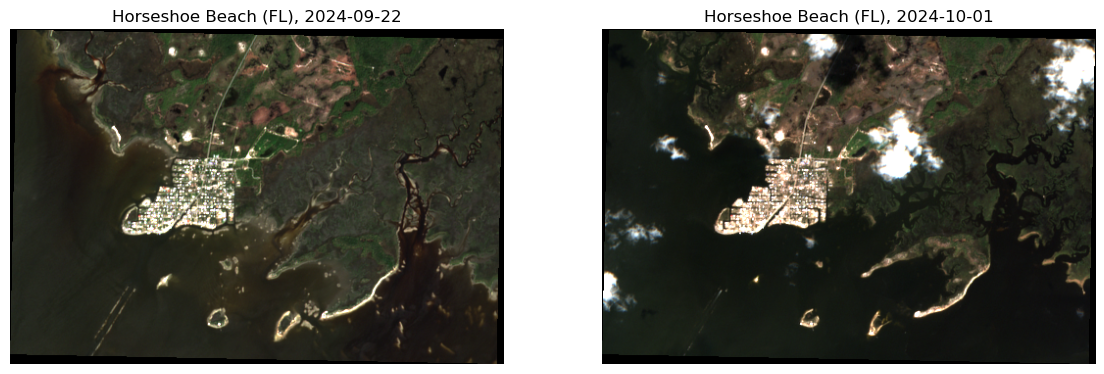

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
img_09 = np.dstack((red_09[0,:,:], green_09[0,:,:], blue_09[0,:,:]))
img_10 = np.dstack((red_10[0,:,:], green_10[0,:,:], blue_10[0,:,:]))

axes[0].imshow(img_09/2000)
axes[0].set_title("Horseshoe Beach (FL), 2024-09-22")
axes[0].axis('off')

axes[1].imshow(img_10/2000)
axes[1].set_title("Horseshoe Beach (FL), 2024-10-01")
axes[1].axis('off');


The estuaries of the rivers seem larger on the post-hurricane image. Let's compute the Normalized Difference Water Index (**NDWI**) for both images. This indicator is widely used to highlight water surfaces, and has applications especially in the agricultural sector. It is calculated by performing the normalized difference between the green and near infrared spectral bands.



The usual formula for calculating NDWI is: $$\frac{B8 - B3}{B8 + B3}$$ 

In [29]:
ndwi_09 = ((green_09.astype(np.float64)-nir_09.astype(np.float64))/(green_09+nir_09))[0,:,:]
ndwi_10 = ((green_10.astype(np.float64)-nir_10.astype(np.float64))/(green_10+nir_10))[0,:,:]

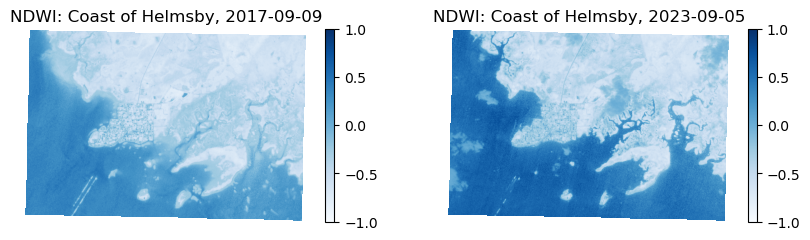

In [30]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

im = axes[0].imshow(ndwi_09, cmap='Blues', vmin=-1, vmax=1)
axes[0].set_title("NDWI: Coast of Helmsby, 2017-09-09")
axes[0].axis('off');
cb = plt.colorbar(im, shrink=0.5)

im= axes[1].imshow(ndwi_10, cmap='Blues', vmin=-1, vmax=1)
axes[1].set_title("NDWI: Coast of Helmsby, 2023-09-05")
axes[1].axis('off');
cb = plt.colorbar(im, shrink=0.5)

Thresholding those two MDWI images will yield two water masks. We can then combine them to highlight the flooded surfaces in the area.

In [31]:
threshold = -0.2

water_mask_09 = np.where(ndwi_09 > threshold, 1, 0)
water_mask_10 = np.where(ndwi_10 > threshold, 1, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.12].


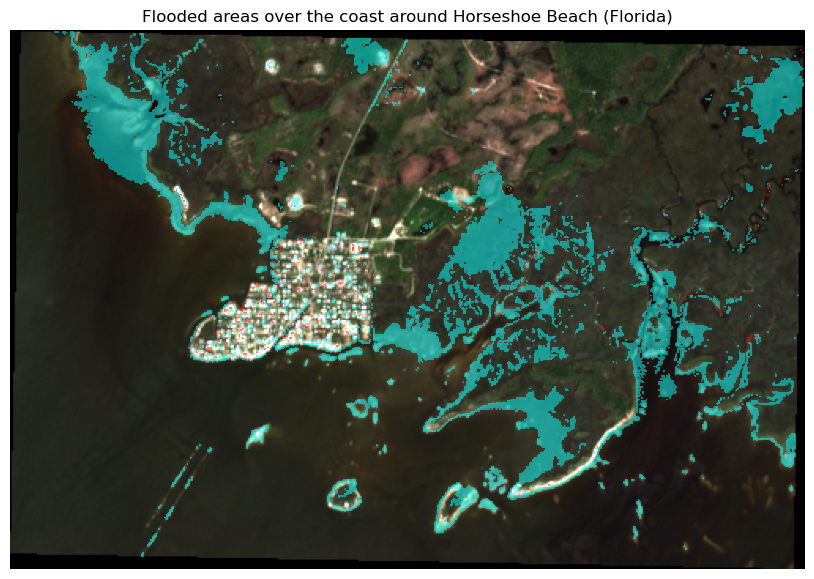

In [32]:
from matplotlib.colors import ListedColormap
cmap=ListedColormap([(1,0,0,1),(0,0,0,0),(0,1,1,1)])

water_change = water_mask_10 - water_mask_09

fig, ax = plt.subplots(figsize=(14,7))

ax.imshow(img_09/2000)
ax.imshow(water_change, cmap=cmap, alpha=0.5)
ax.set_title("Flooded areas over the coast around Horseshoe Beach (Florida)")
ax.axis('off');

We can see that several parts of the coast were submerged by the sea after the storm, sometimes very close to the city. Horseshoe Beach is known to have particularly suffered from Hurricane Helene, with significant societal, economic, and environmental impacts. Effective monitoring is crucial for authorities and communities to prepare for, mitigate, and respond to these events.

# 8. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have observed Hurricane Helene, that struck Florida in September 2024, and its impacts on the coast. We highlighted the storm surge with tide gauges and showed the flooding it caused using Sentinel-2 images.



# 9. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.

**Beginners** :

- In [Section 4.3](#4.3-Drawing-a-wind-vector-field), we drew the wind vector field over the coast of Florida. Try plotting the map for other dates.

- In [Section 6](#6.-Highlighting-the-storm-surge-using-in-situ-data.), we selected a few tide gauges to look at the storm surge on the coast of Florida. There are several other stations located in the area, you can try adding some of them to the analysis.

**Intermediate** :

- You can reproduce the animation we did in [Section 5](#5.-Monitoring-the-trajectory-of-the-Hurricane) for other recent hurricanes. You can for example use [this database](https://oceanservice.noaa.gov/hazards/hurricanes/hurricane-archive.html) to research other similar events.

- You can assess the magnitude of the coastal floodings caused by Hurricane Helene, like we did in [Section 7](#7.-Looking-at-the-coastal-impacts-of-the-hurricane-using-Sentinel-2-images), on other areas. You can either re-use the Sentinel-2 images already downloaded for neighbouring areas, or find other images if you want to look further. You will have to find images without clouds!

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study coastal interactions. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !


# Additional Information
---

#### Compatible Data Science Toolkits

In [74]:
import pkg_resources; pkg_resources.get_distribution("hda").version

'2.18'

In [75]:
import xarray; print(xarray.__version__)

2024.9.0


#### Last Modified and Tested

In [76]:
from datetime import date; print(date.today())

2024-11-19


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>